In [1]:
import pandas as pd
import floweaver as fl
from ipysankeywidget import SankeyWidget
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid')
sns.set(font_scale=2)

#### PubMed occurrences of disease terms

In [2]:
filepath = './disease-trends/data_extraction/research/'

In [3]:
df = pd.read_csv(filepath + 'ncomms5212-s2.txt', sep='\t')

In [25]:
df.shape

(4442, 2)

In [18]:
df.head()

,MeSH Disease Term,PubMed occurrence
0,Breast Neoplasms,122226
1,Hypertension,107294
2,Coronary Artery Disease,82819
3,Lung Neoplasms,78009
4,Myocardial Infarction,75945


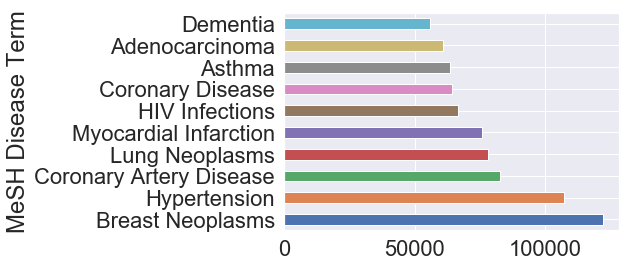

In [12]:
df.head(10).plot(x='MeSH Disease Term', y='PubMed occurrence', kind='barh', 
               legend=False)

#### PubMed occurrences of symptom terms

In [19]:
df = pd.read_csv(filepath + 'ncomms5212-s3.txt', sep='\t')

In [23]:
df.shape

(322, 2)

In [20]:
df.head()

,MeSH Symptom Term,PubMed occurrence
0,Body Weight,147857
1,Pain,103168
2,Obesity,100301
3,Anoxia,47351
4,Mental Retardation,43883


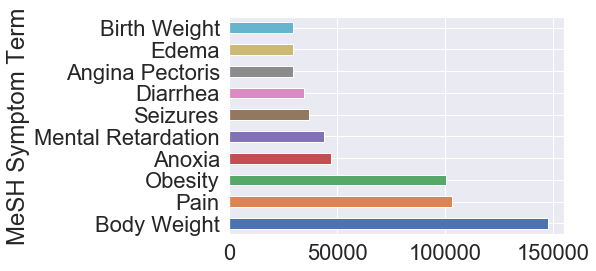

In [22]:
df.head(10).plot(x='MeSH Symptom Term', y='PubMed occurrence', kind='barh', 
               legend=False)

### Symtom <===> Disease

In [40]:
df = pd.read_csv(filepath + 'ncomms5212-s4.txt', sep='\t')

In [41]:
df.shape

(147978, 4)

In [44]:
df.head()

,MeSH Symptom Term,MeSH Disease Term,PubMed occurrence,TFIDF score
0,"Aging, Premature",Respiratory Syncytial Virus Infections,1,3.464551
1,"Aging, Premature",Orthomyxoviridae Infections,1,3.464551
2,"Aging, Premature",HIV Infections,3,10.393654
3,"Aging, Premature",Acquired Immunodeficiency Syndrome,3,10.393654
4,"Aging, Premature",Breast Neoplasms,1,3.464551


In [30]:
# TODO
# - network analysis

In [42]:
# only look at one disease
one_disease = 'HIV Infections'
df = df[df['MeSH Disease Term'] == one_disease]

# keep top 10 symptoms
valueCol = 'PubMed occurrence'
df.sort_values(by=valueCol, inplace=True, ascending=False)
df.loc[df[valueCol] < df[valueCol].nlargest(10).min(), 'MeSH Symptom Term'] = 'Other'

target_cats = list(df['MeSH Symptom Term'].unique().astype(str))
source_cats = list(df['MeSH Disease Term'].unique().astype(str))
extent = ['MeSH Disease Term', 'MeSH Symptom Term']

# define params
source_point = 0
target_point = 1
palette = None 
if_waypoints = False

# define nodes
nodes = {extent[0]: fl.ProcessGroup(source_cats), 
         extent[1]: fl.ProcessGroup(target_cats)}

# define endpoints
source = extent[source_point]
target = extent[target_point]

# define params
ordering = [[extent[0]], [extent[1]]]
bundles = [fl.Bundle(source, target)]

# endpoint partitions
part_source = fl.Partition.Simple("process", source_cats)
part_target = fl.Partition.Simple("process", target_cats)

# add to nodes
nodes[extent[source_point]].partition = part_source
nodes[extent[target_point]].partition = part_target

# define the sankey
sdd = fl.SankeyDefinition(nodes, bundles, ordering)

# weave it
sankey_data = fl.weave(sdd, df[extent + [valueCol]]
     .rename(columns={source:'source', target:'target', valueCol: 'value'}))

In [45]:
# visualize sankey
sankey_data.to_widget(**dict(width=800, height=1000))  #.auto_save_png('sankey_example.png')

A Jupyter Widget

In [44]:
# save as json for input to d3
sJson = sankey_data.to_json()

In [34]:
import json
with open('sankey_json.json', 'w') as f:
    json.dump(sJson, f)

#### Symptom similarity score

In [35]:
df = pd.read_csv(filepath + 'ncomms5212-s5.txt', sep='\t')

In [36]:
df.shape

(133106, 3)

In [37]:
df.head()

,MeSH Disease Term,MeSH Disease Term.1,symptom similarity score
0,"Histiocytoma, Benign Fibrous",Aneurysm,0.591937
1,"Histiocytoma, Benign Fibrous","Carcinoma, Basal Cell",0.310479
2,"Arthropathy, Neurogenic","Corneal Dystrophies, Hereditary",0.133123
3,"Arthropathy, Neurogenic","Foot Deformities, Congenital",0.156900
4,"Hemangioendothelioma, Epithelioid",Thyroid Neoplasms,0.157077


In [34]:
# TODO
# - network analysis in Gephi -> symptom similarity score = edge weight